# Projet de classification du risque cardiaque

Les problèmes cardiaques sont une des principales causes de mortalité dans le monde. Le dataset utilisé "Heart Attack Risk Prediction Dataset"  référence différents facteurs pouvant influencer une crise cardiaque.

L'objectif de ce projet sera d'analyser ce dataset afin d'être en mesure de **prédire le risque de crise cardiaque**.

Les différentes étapes dans ce projet seront :
- L'exploration des données ;
- Une première étape de classification en utilisant un modèle Gaussien ;
- Une deuxième étape de classification avec un protocole de test des modèles.

L'objectif final est d'obtenir **une courbe présentant une métrique en fonction d'un ou deux facteurs** pour montrer qu'on a utilisé *la meilleure valeur* du ou des facteurs représentés.

# I. Exploration des données

## A. Téléchargement des données

Les document csv contenant notre set de données est renseigné dans le dossier data.

In [1]:
# Importation des bibliothèques utiles

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [2]:
# Récupération des datas

filename = "data/heart_attack_prediction_dataset.csv"
donnees = pd.read_csv(filename)

# Premières observation / vérification du chargement des données

print("Les attributs de nos données sont :\n", donnees.keys(), "\n")
print("Le format du tableau de nos données est : ", donnees.shape, "\n")
print("Les premières lignes du tableau sont les suivantes :")
donnees.head(5)

Les attributs de nos données sont :
 Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object') 

Le format du tableau de nos données est :  (8763, 26) 

Les premières lignes du tableau sont les suivantes :


,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


## B. Visualisation des données à travers des graphes

In [3]:
donnees.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [4]:
donnees.dtypes

Patient ID                          object
Age                                  int64
Sex                                 object
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Diet                                object
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Country                             object
Continent  

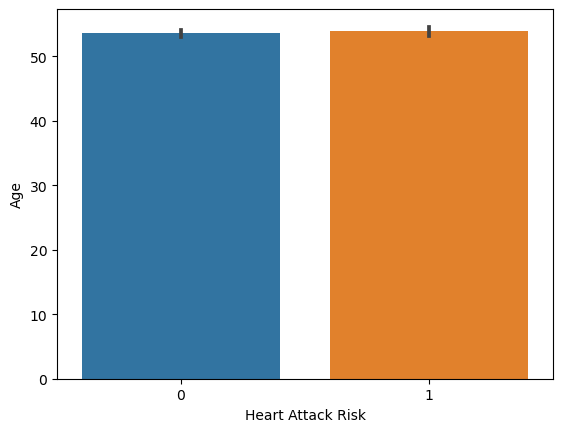

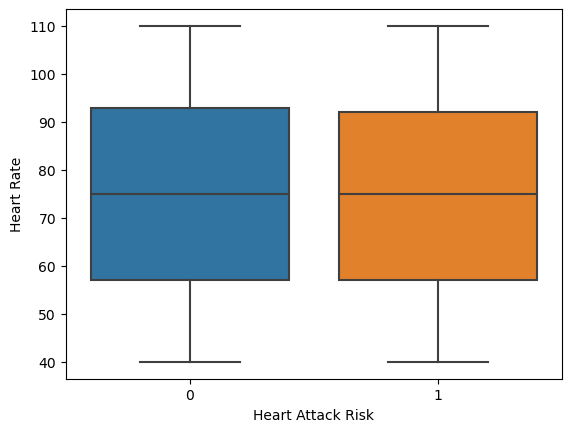

In [5]:
age = donnees["Age"]
risque = donnees["Heart Attack Risk"]

sns.barplot(x="Heart Attack Risk", y="Age", data=donnees)
plt.show()
sns.boxplot(x="Heart Attack Risk", y="Heart Rate", data=donnees)
plt.show()


In [6]:
donnees.drop(["Patient ID", 'Sex', 'Blood Pressure', 'Diet', 'BMI', 'Country', 'Continent', 'Hemisphere'], axis=1, inplace=True)

In [13]:
##############################################
### Création des inputs X et des outputs Y ###
##############################################

# Transformation des données pour avoir un format exploitable en analyse
data = donnees.values

# Obtention des entrées et sorties bruts
Xbrut = data[:, :-1]
Ybrut = np.ravel(data[:, -1:])
print(Xbrut[:2,:])
print(Ybrut[:2])

# Séparation des données pour créer un ensemble d'entraînement et un ensemble de test
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xbrut, Ybrut, test_size=0.33, random_state=0)
print(Xtrain.shape)
print(Ytrain.shape)

[[6.70000000e+01 2.08000000e+02 7.20000000e+01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 0.00000000e+00 0.00000000e+00
  4.16818884e+00 0.00000000e+00 0.00000000e+00 9.00000000e+00
  6.61500145e+00 2.61404000e+05 2.86000000e+02 0.00000000e+00
  6.00000000e+00]
 [2.10000000e+01 3.89000000e+02 9.80000000e+01 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.81324162e+00 1.00000000e+00 0.00000000e+00 1.00000000e+00
  4.96345884e+00 2.85768000e+05 2.35000000e+02 1.00000000e+00
  7.00000000e+00]]
[0. 0.]
(5871, 17)
(5871,)


In [14]:
modele = svm.SVC(kernel='linear')
modele.fit(Xtrain, Ytrain)
Ytest_hat = modele.predict(Xtest)


NameError: name 'accuracy_score' is not defined